In [1]:
#Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#Read data file
df=pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# List all algorithms in use
algos = set(df.Algorithm.values)
print(algos)

{'Momentum', '1GB AES Pattern Search', 'X11GOST', 'Cloverhash', 'QuBit', 'Groestl', 'VeChainThor Authority', 'CryptoNight-lite', 'Argon2d', 'Proof-of-BibleHash', 'Exosis', 'Equihash+Scrypt', 'PHI1612', 'Zhash', 'Blake2S', 'Curve25519', 'Rainforest', 'QUAIT', 'TRC10', 'Semux BFT consensus', 'Quark', 'SHA3-256', 'Slatechain', 'SkunkHash v2 Raptor', 'X16S', 'CryptoNight-Lite', 'SHA3', 'Progressive-n', 'POS 2.0', 'Leased POS', 'NeoScrypt', 'Scrypt-n', 'X13', 'POS 3.0', 'Counterparty', 'ECC 256K1', 'Scrypt', 'PoS', 'Jump Consistent Hash', 'X11', 'Cryptonight-GPU', 'Blake', 'vDPOS', 'CryptoNight Heavy X', 'T-Inside', 'Equihash1927', 'SHA-256 + Hive', 'SHA-256', 'SHA-512', 'HMQ1725', 'Shabal256', 'DPoS', 'Wild Keccak', 'Dagger-Hashimoto', 'XEVAN', 'M00N', 'X14', 'Skein', 'Equihash', 'C11', 'HybridScryptHash256', 'X16R', 'Ouroboros', 'Lyra2Z', 'Ethash', 'Lyra2REv2', 'Lyra2RE', 'Avesta hash', 'CryptoNight', 'ScryptOG', 'Keccak', 'QuarkTX', 'XG Hash', 'Time Travel', 'Dagger', 'CryptoNight-V7', '

In [5]:
#filter for currencies that are currently being traded
df= df.loc[df["IsTrading"] == True]

#Remove all rows that have at least one null value
df=df.dropna(axis=0, how="any")

#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df=df.loc[df["TotalCoinsMined"] > 0]

#Drop IsTrading column
df= df.drop("IsTrading", axis=1)
df.shape

(532, 6)

In [6]:
df.TotalCoinsMined.sort_values()

0       4.199995e+01
45      8.800000e+01
175     1.177000e+03
54      4.257948e+04
1001    8.430000e+04
            ...     
1052    9.955311e+10
783     1.430067e+11
769     1.630551e+11
210     1.840668e+11
1234    9.899887e+11
Name: TotalCoinsMined, Length: 532, dtype: float64

In [7]:
#delete the CoinName from the original dataframe

df = df.drop('CoinName', axis=1)
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [8]:
len(df)

532

In [10]:
df= df.drop("Unnamed: 0", axis=1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [11]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data
X = pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
 X_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [14]:
#  numbers of rows and columns in the scaled data
X_scaled.shape

(532, 98)

In [15]:
# Using PCA to perform dimensionality reduction
pca= PCA(n_components=0.9)
components = pca.fit_transform(X_scaled)
components.shape

(532, 74)

In [16]:
pca.explained_variance_.sum()

88.47283457566152

In [18]:
# Using TSNE to reduce dataset dimensions
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(components)
tsne_features.shape

(532, 2)

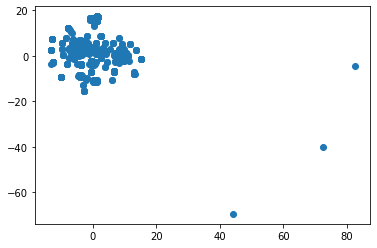

In [19]:
# Plot t-SNE output
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [20]:
# Identify clusters with k-means
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(components)
    inertia.append(kmeans.inertia_)

C:\Users\rmsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<AxesSubplot:xlabel='k'>

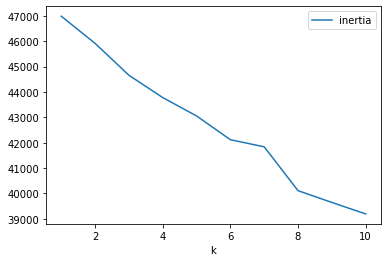

In [21]:
#Create Elbow Plot
elbow_data= {"k": k, "inertia": inertia}
df_elbow=pd.DataFrame(elbow_data)
df_elbow.head()
df_elbow.plot(x='k', y= 'inertia')

# Recommendation to clients

I would not recommend classifying cryptocurrency in this manner. There was not any observable or distinct clustering for the cryptocurrency data using either TSNE or K-means.